# Telco Customer Churn Prediction — Interpretation & Business Insights

### Step 1: Load Data and Model (from previous steps)

In [9]:

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import shap
import joblib

# Load saved model
xgb_best_model = joblib.load('../models/xgb_best_model.pkl')

# Load final training data and best XGBoost model if needed
# Assume grid_xgb.best_estimator_ from previous notebook is available or saved.
# If using the same environment, proceed with that model.


In [10]:
# Load preprocessed data
df = pd.read_csv('../data/preprocessed_telco.csv')
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Optionally split — but for SHAP, you can just use full X or X_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Step 2: SHAP Explainability for XGBoost Model

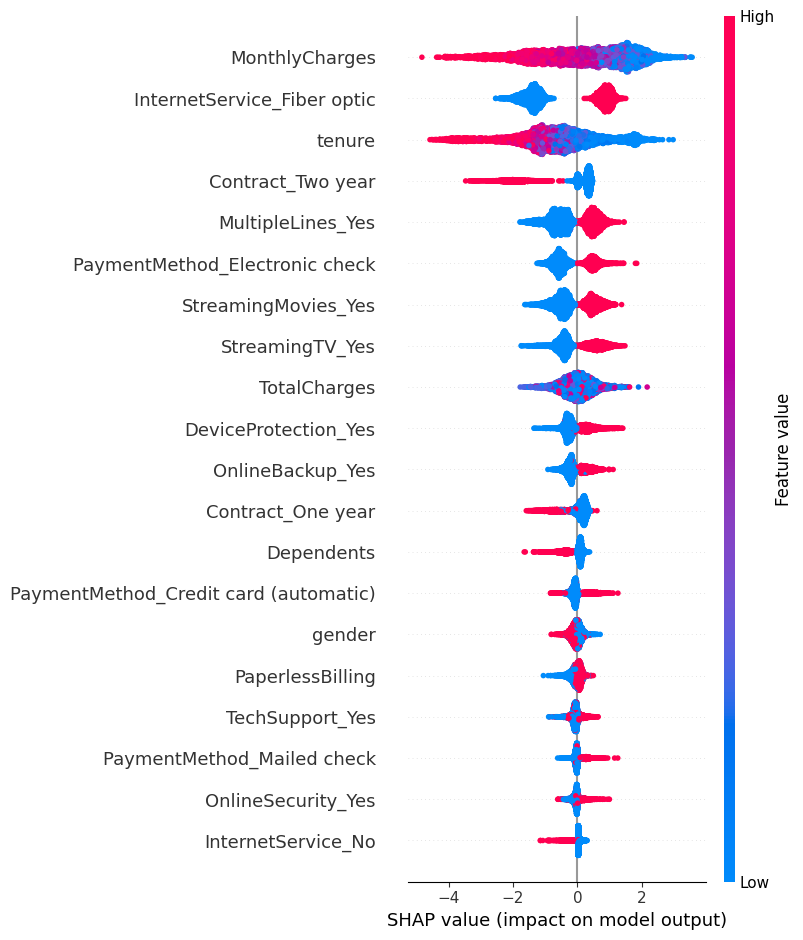

In [11]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train)

### Step 3: SHAP Bar Plot for Mean Feature Importance

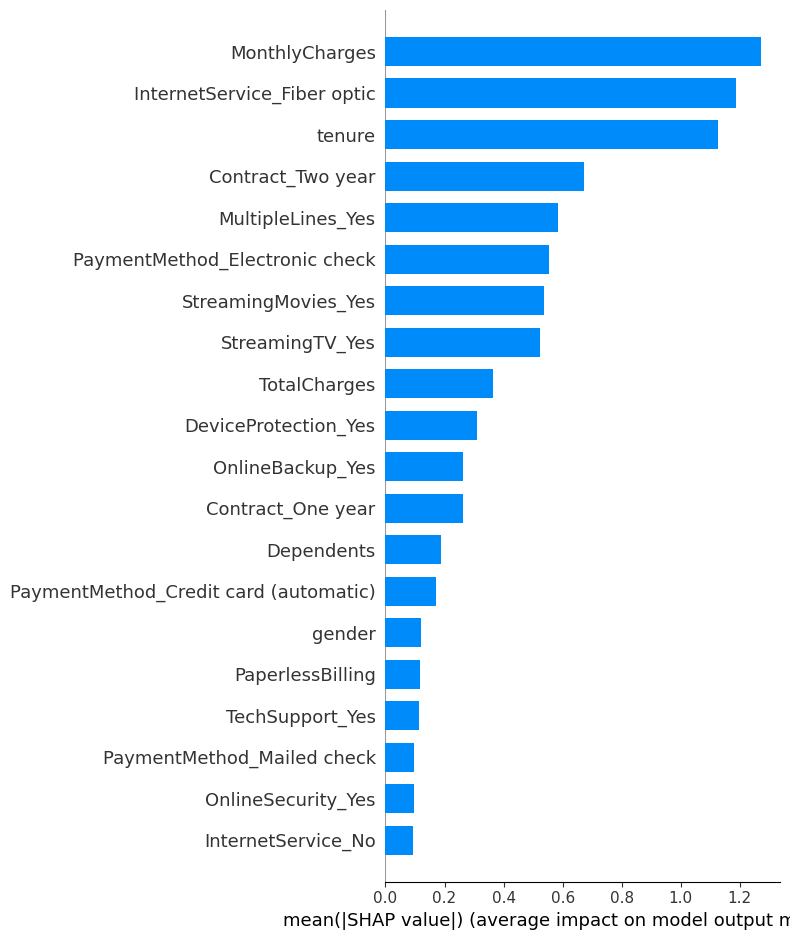

In [12]:

shap.summary_plot(shap_values, X_train, plot_type="bar")


### Step 4: Key Observations


**Observations:**  
- Customers with month-to-month contracts, high monthly charges, and short tenure show the highest churn risk.  
- Tenure group features and average monthly charges significantly impact churn prediction.  
- Payment method using electronic checks and fiber optic internet are correlated with higher churn likelihood.  
- Features related to additional services (streaming, security, backup) influence retention but less strongly than contract and billing factors.  


### Step 5: Business Recommendations


**Recommendations for Businesses:**  
- Target customers with month-to-month contracts with loyalty discounts and retention offers.  
- Encourage long-term contracts by providing bundled service incentives.  
- Focus on customers with higher monthly charges but low tenure — they are the most likely to churn.  
- Improve service quality in areas where fiber optic internet churn rates are high.  
- Promote automatic payment methods and reduce reliance on electronic check payments.  
